In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# Extracting data
data = yf.download('TATAMOTORS.NS', period = '2y')
data.head()

#taking avg and standard deviation of 20 days
data['SMA'] = data.Close.rolling(20).mean()
data['STD'] = data.Close.rolling(20).std()
data['BOLL'] = data['SMA'] - 2 * data['STD']
data['BOLU'] = data['SMA'] + 2 * data['STD']
#data = data.dropna()
#data
#TATAMOTORS.NS.financials

[*********************100%***********************]  1 of 1 completed


In [3]:
#creating buy signal and sell signal 
data['Buy_signal'] = np.where(data.Close < data.BOLL, True ,False)
data['Sell_signal'] = np.where(data.Close > data.SMA, True ,False)
data = data.dropna()

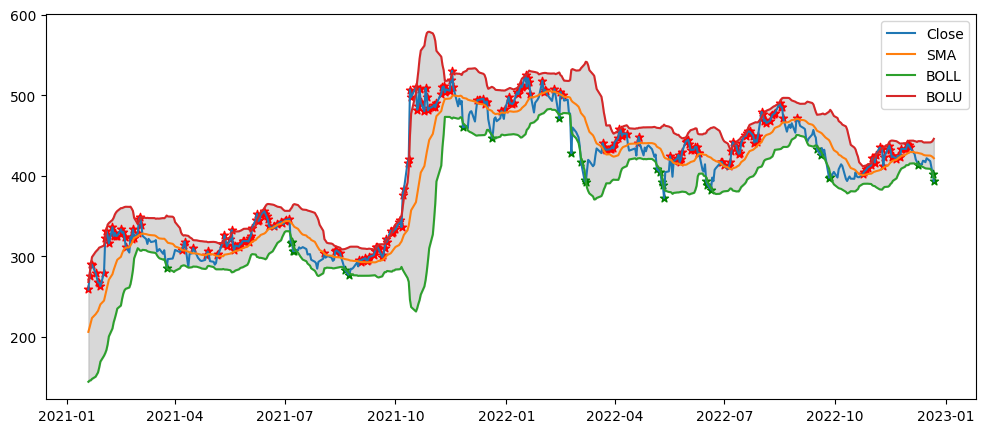

In [4]:
plt.figure(figsize=(12,5))
plt.plot(data[['Close','SMA','BOLL','BOLU']])
plt.fill_between(data.index, data.BOLL, data.BOLU, color='grey', alpha=0.3)
plt.scatter(data.index[data.Buy_signal,], data[data.Buy_signal].Close, marker='*', color='g')
plt.scatter(data.index[data.Sell_signal,], data[data.Sell_signal].Close, marker='*', color='r')
plt.legend(['Close','SMA','BOLL','BOLU'])
plt.show()


In [5]:
buy = []
sell = []
open_pos = False

for i in range(len(data)):
    if data.BOLL[i] > data.Close[i]:
        if open_pos == False:
            buy.append(i)
            open_pos = True
    elif data.Close[i] > data.SMA[i]:
        if open_pos:
            sell.append(i)
            open_pos = False


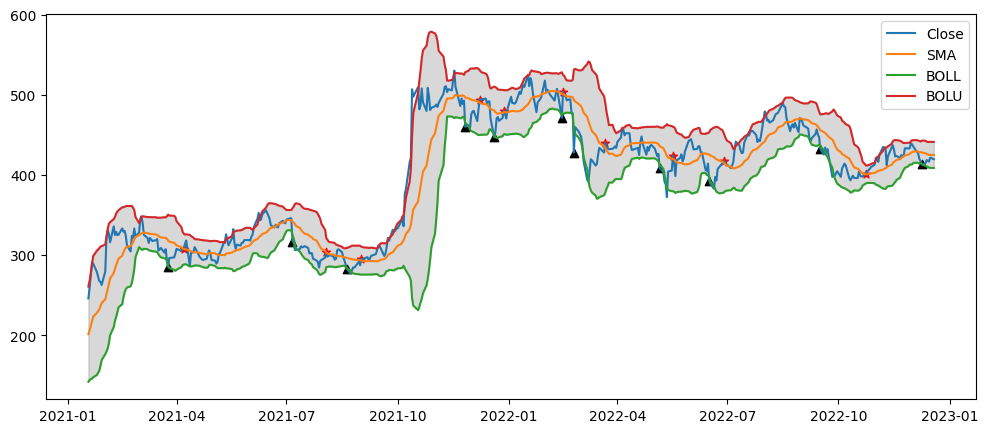

In [19]:
plt.figure(figsize=(12,5))
plt.plot(data[['Close','SMA','BOLL','BOLU']])
plt.fill_between(data.index, data.BOLL, data.BOLU, color='grey', alpha=0.3)
plt.scatter(data.iloc[buy].index, data.iloc[buy].Close, marker='^', color='black', alpha=1)
plt.scatter(data.iloc[sell].index, data.iloc[sell].Close, marker='*', color='r')
plt.legend(['Close','SMA','BOLL','BOLU'])
plt.show()

In [20]:
merged = pd.concat([data.iloc[buy].Close,data.iloc[sell].Close], axis =1)
merged.columns= ['buy','sell']
profit = merged.shift(-1).sell - merged.buy
profit = profit.mean()